In [1]:
import yaml
import matplotlib.pyplot as plt

In [2]:
def read_experiment(config_path):
    with open(config_path, 'r') as f:
        config = yaml.safe_load(f)
    
    return config

def get_runs_result(config):
    runs = config['run_history']
    results = []
    
    for run in runs:
        if not "weighted_val_perplexity" in run:
            print("Run did not finish yet")
            continue
        run_results = {
            "domain_results": {},
            "weighted_val_perplexity": None,
            "mixing_weights": None
        }
        val_result = run['val_results'][-1]
        for domain, domain_result in val_result.items():
            run_results['domain_results'][domain] = domain_result['perplexity']
        
        run_results['weighted_val_perplexity'] = run["weighted_val_perplexity"]
        run_results['mixing_weights'] = run["true_mixing_weights"]
        results.append(run_results)

    return results


def plot_weighted_val_perplexity(results):
    weighted_val_perplexity = [result['weighted_val_perplexity'] for result in results]
    plt.plot(weighted_val_perplexity)
    plt.xlabel('Run')
    plt.ylabel('Weighted Val Perplexity')
    plt.title('Weighted Val Perplexity')

def plot_domain_perplexities(results):
    max_plots_per_row = 4
    domains = results[0]['domain_results'].keys()
    num_plots = len(domains)
    num_rows = num_plots // max_plots_per_row + 1
    num_cols = min(num_plots, max_plots_per_row)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.suptitle('Domain Perplexities')
    axs = axs.flatten()
    for i, domain in enumerate(domains):
        domain_perplexities = [result['domain_results'][domain] for result in results]
        axs[i].plot(domain_perplexities)
        axs[i].set_title(domain)
        axs[i].set_xlabel('Run')
        axs[i].set_ylabel('Perplexity')
    plt.tight_layout()  

def plot_mixing_weights(results):
    max_plots_per_row = 4
    domains = results[0]['domain_results'].keys()
    mixing_weights = [result['mixing_weights'] for result in results]
    num_plots = len(domains)
    num_rows = num_plots // max_plots_per_row + 1
    num_cols = min(num_plots, max_plots_per_row)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.suptitle('Mixing Weights')
    axs = axs.flatten()

    for i, domain in enumerate(domains):
        mixing_weights = [r["mixing_weights"][i] for r in results]
        axs[i].plot(mixing_weights)
        axs[i].set_title(domain)
        axs[i].set_xlabel('Run')
        axs[i].set_ylabel('Mixing Weight')
        axs[i].legend()
    plt.tight_layout()  

Run did not finish yet


/tmp/ipykernel_4105253/2971577052.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


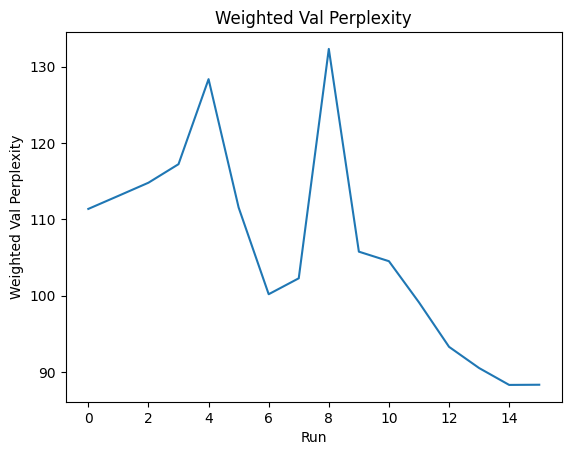

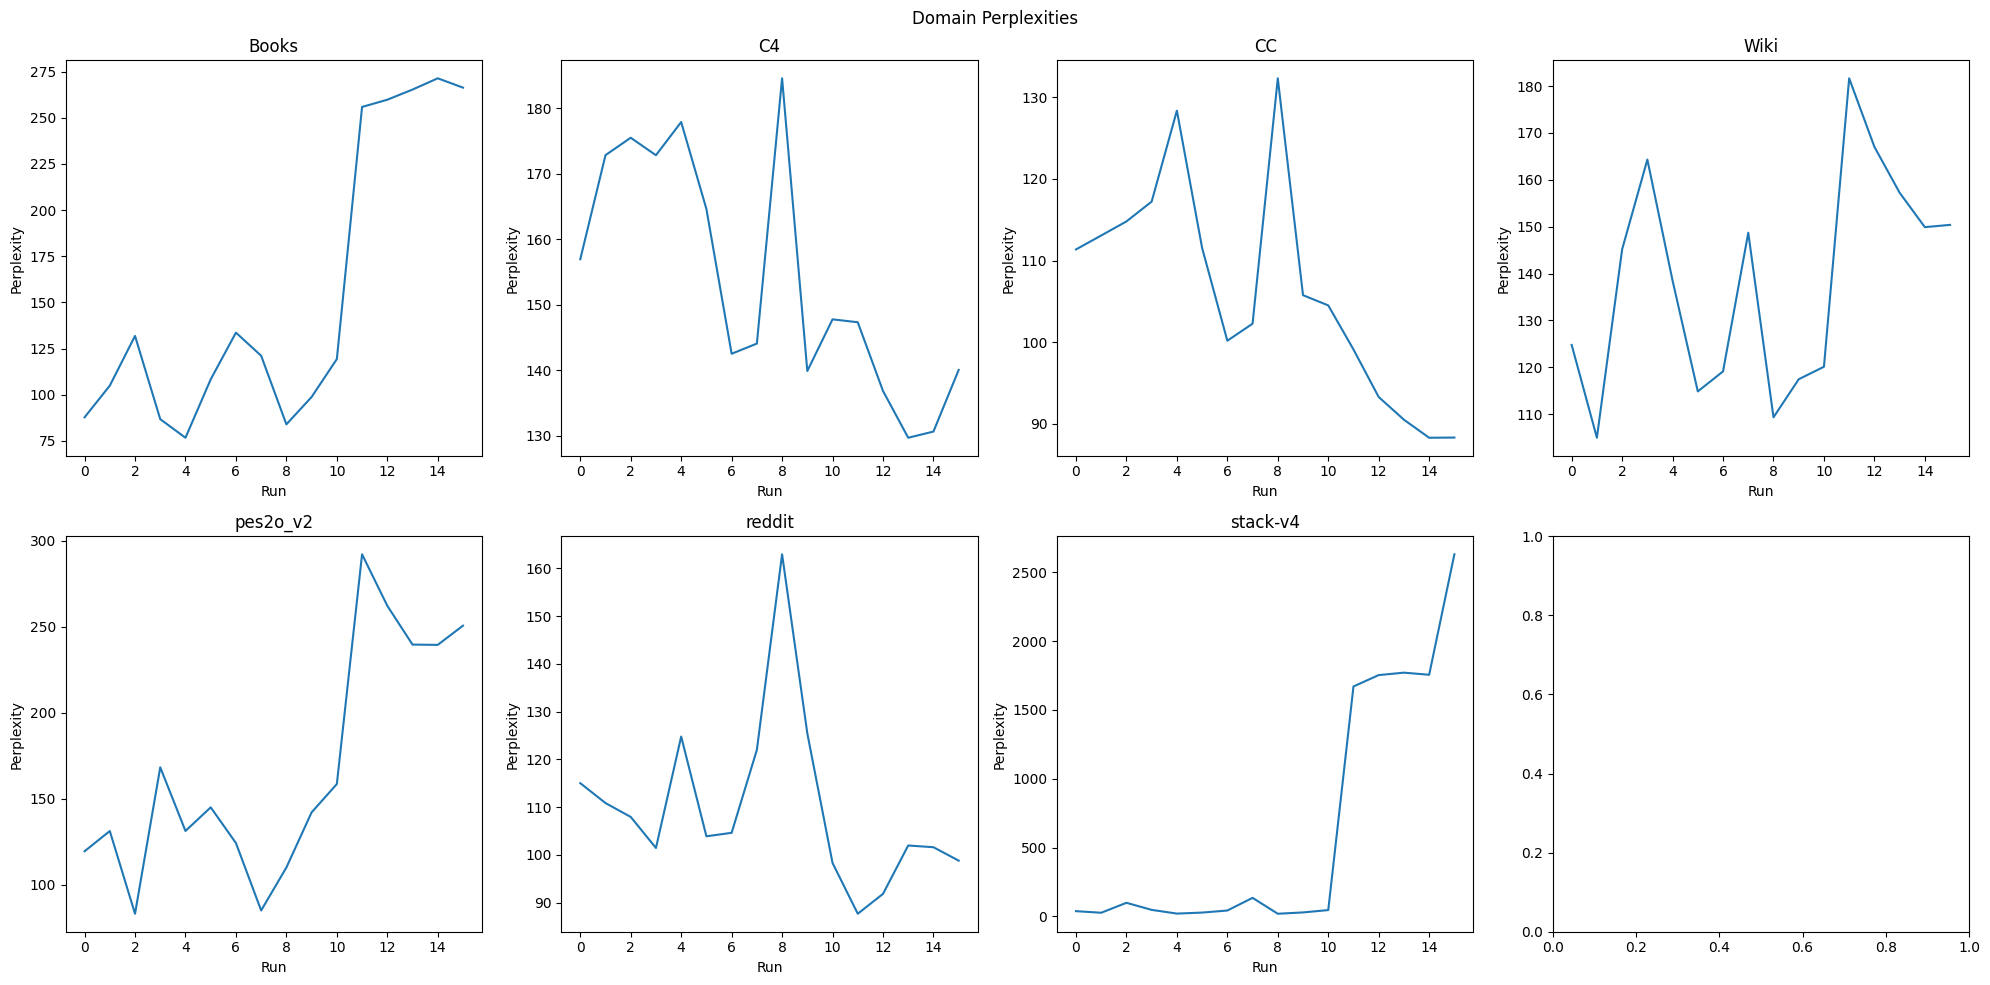

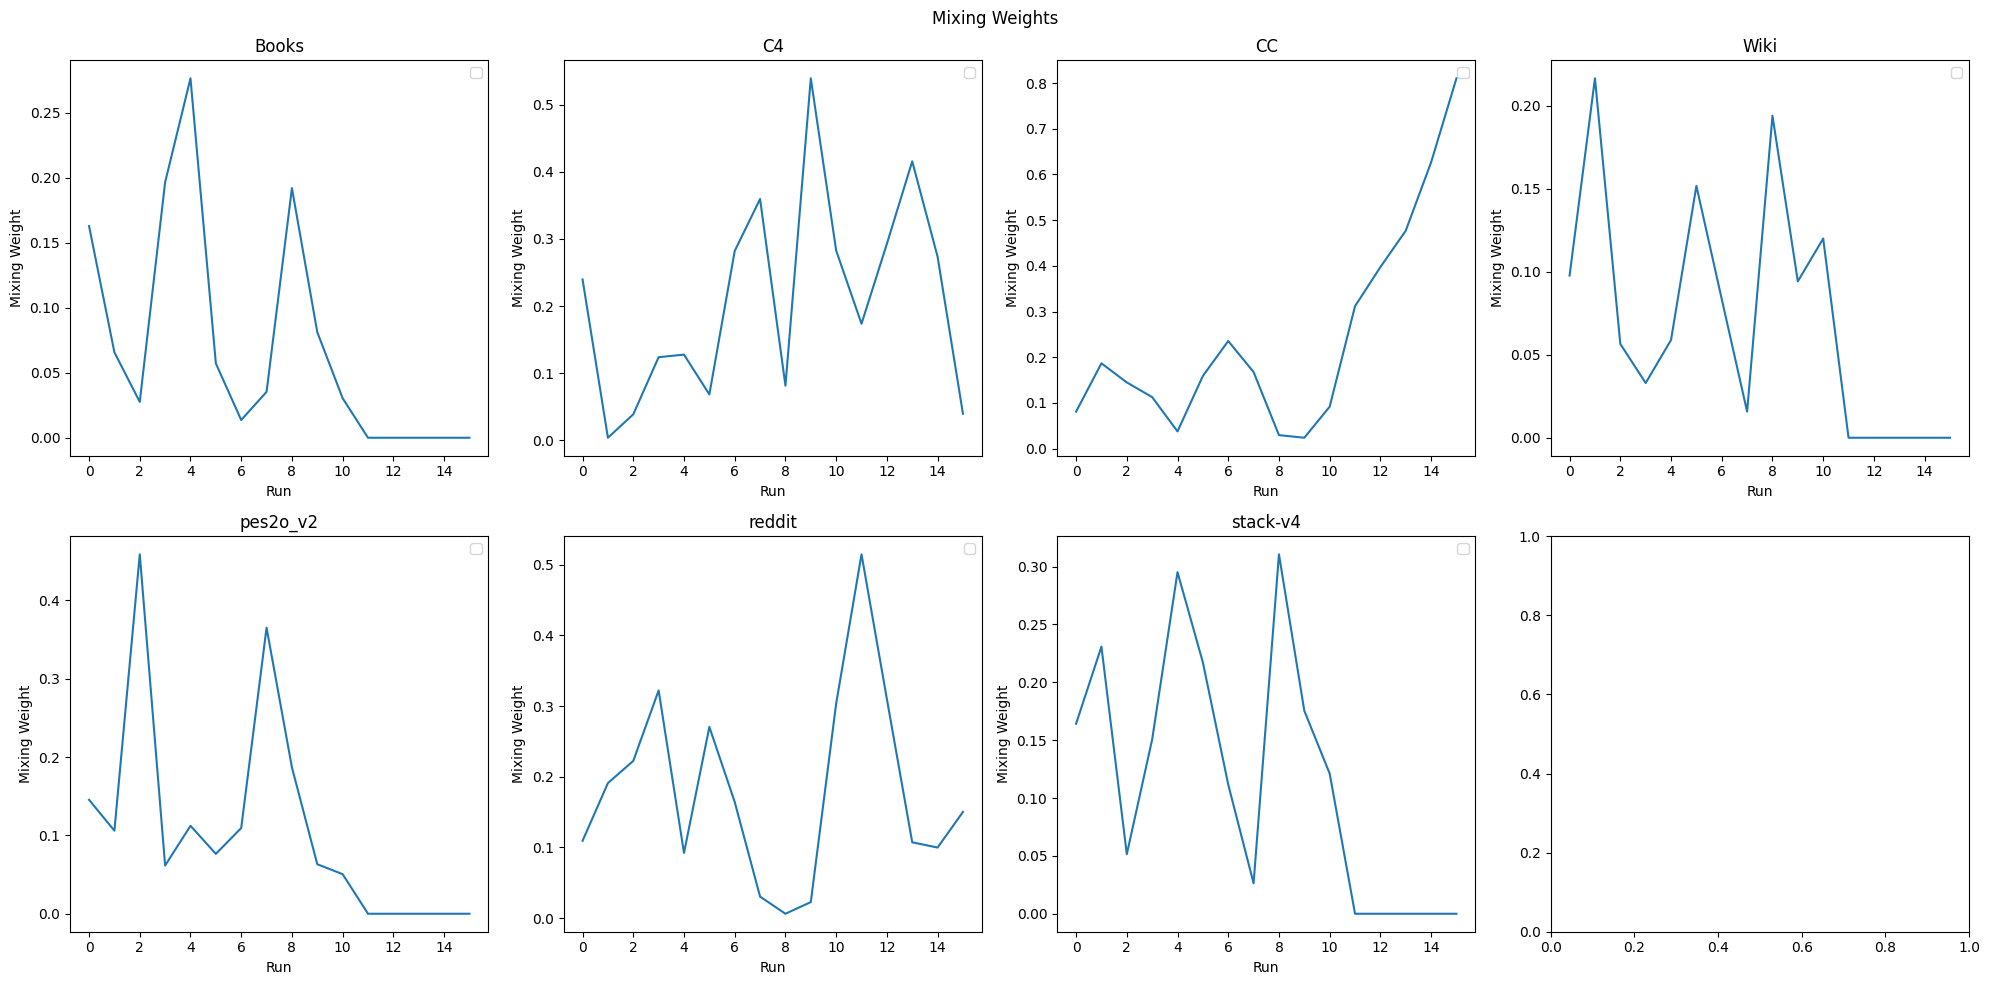

In [3]:
config_path = "../logs/turbo_0/config.yaml"
config = read_experiment(config_path)
results = get_runs_result(config)

plot_weighted_val_perplexity(results)
plot_domain_perplexities(results)
plot_mixing_weights(results)
plt.show()